In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [172]:
# Loading the dataset to a pandas dataframe

diabetes_dataset = pd.read_csv('diabetes_data_upload.csv')

In [173]:
# Loading first 5 rows of the dataset

diabetes_dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [174]:
diabetes_dataset.isnull()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# b) Data Set Visualization (Cheking for null)

<Axes: >

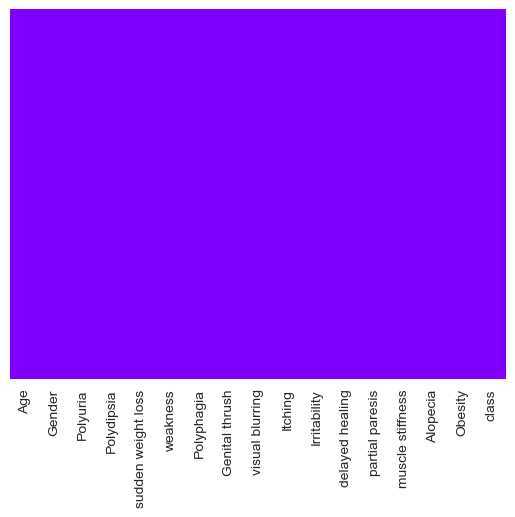

In [175]:
sns.heatmap(diabetes_dataset.isnull(), yticklabels = False, cbar= False, cmap='rainbow')

there is no null values

In [176]:
sns.set_style('whitegrid')

C:\Users\Muhammad Iqbal\AppData\Local\Temp\ipykernel_18448\2723500909.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diabetes_dataset.corr(), cmap='coolwarm', annot=True)


<Axes: >

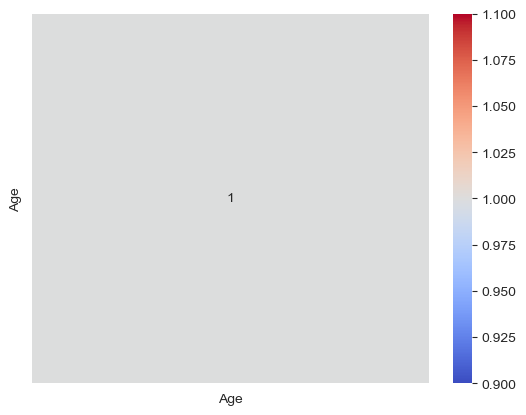

In [177]:
sns.heatmap(diabetes_dataset.corr(), cmap='coolwarm', annot=True)

<Axes: xlabel='Age', ylabel='count'>

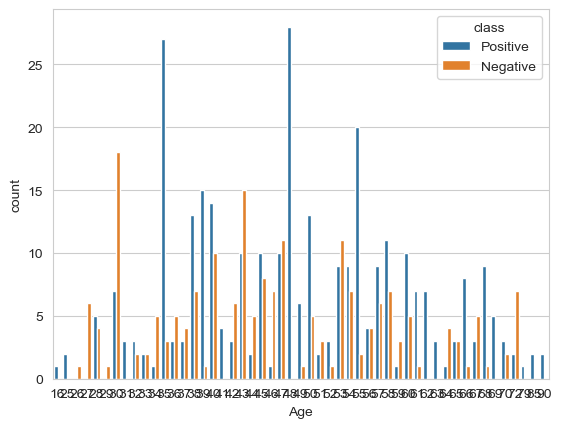

In [178]:
sns.countplot(x='Age', data=diabetes_dataset, hue='class')

<Axes: xlabel='weakness', ylabel='count'>

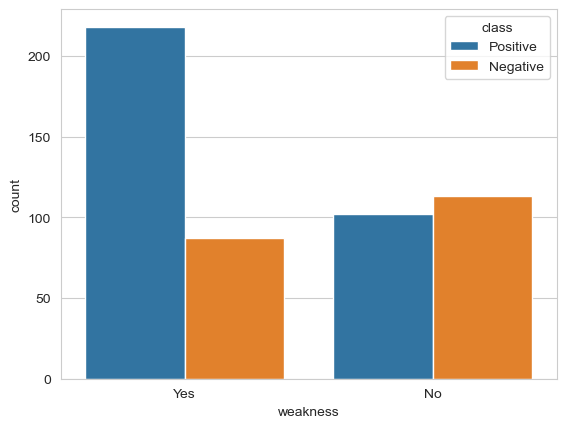

In [179]:
sns.countplot(x='weakness', hue='class', data=diabetes_dataset)

<Axes: xlabel='visual blurring', ylabel='count'>

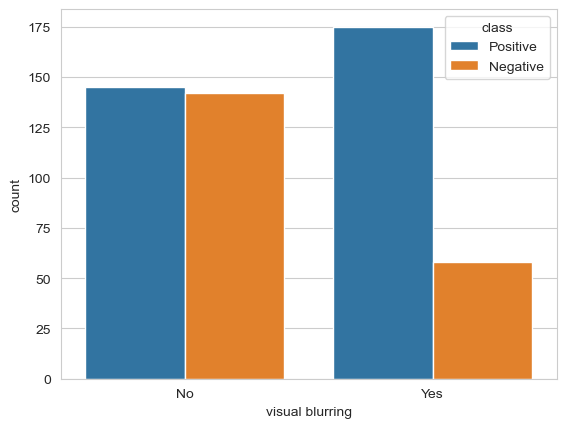

In [180]:
sns.countplot(x='visual blurring', hue='class', data=diabetes_dataset)

In [181]:
diabetes_dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


<Axes: ylabel='Frequency'>

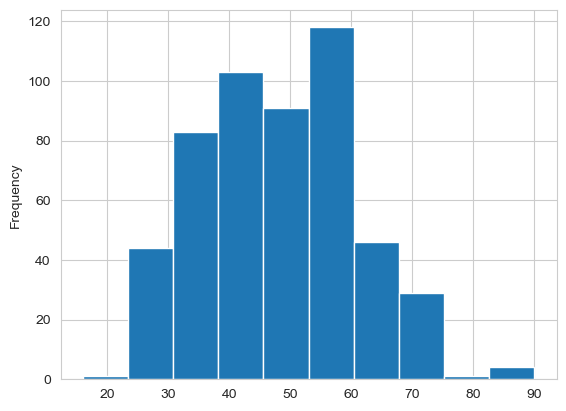

In [182]:
diabetes_dataset['Age'].plot.hist()

<Axes: ylabel='Frequency'>

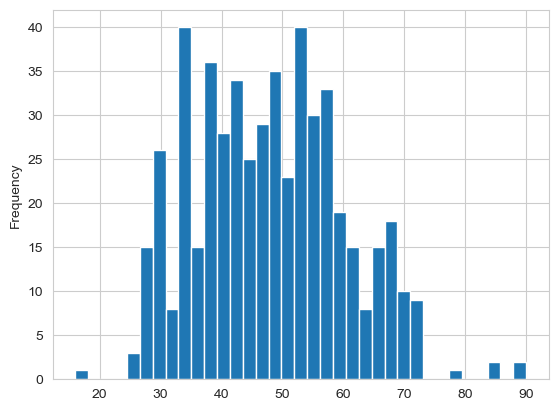

In [183]:
diabetes_dataset['Age'].plot.hist(bins=35)

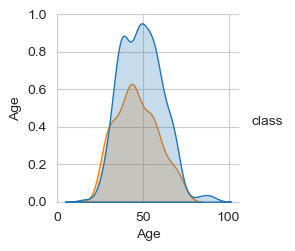

In [184]:
sns.pairplot(diabetes_dataset, hue='class')

In [185]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

<Axes: xlabel='class', ylabel='Age'>

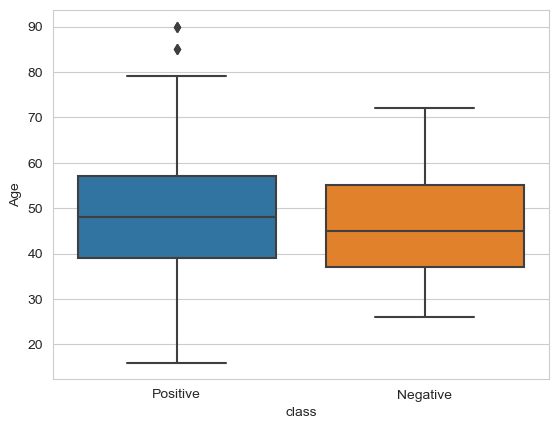

In [186]:
sns.boxplot(x='class', y='Age', data=diabetes_dataset)

# c) Data Set Cleaning/Preprocessing

In [187]:
# Creating dummy for column class

pd.get_dummies(diabetes_dataset['class'])

,Negative,Positive
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
515,0,1
516,0,1
517,0,1
518,1,0


In [188]:
pd.get_dummies(diabetes_dataset['class'], drop_first=True)

,Positive
0,1
1,1
2,1
3,1
4,1
...,...
515,1
516,1
517,1
518,0


In [189]:
Class = pd.get_dummies(diabetes_dataset['class'], drop_first=True)

In [190]:
Class.head()

,Positive
0,1
1,1
2,1
3,1
4,1


In [191]:
# Specify the name of the columns in get_dummies python pandas

Class = pd.get_dummies(diabetes_dataset['class'], drop_first=True).rename(columns=lambda x:'Class_' +str(x))

In [192]:
Class.head()

,Class_Positive
0,1
1,1
2,1
3,1
4,1


In [193]:
diabetes_dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [194]:
# Creating dummy for column Gender and specify the name of the columns in get_dummies python pandas

gender = pd.get_dummies(diabetes_dataset['Gender'], drop_first=True).rename(columns=lambda x:'Gender_' +str(x))

In [195]:
gender.head()

,Gender_Male
0,1
1,1
2,1
3,1
4,1


In [196]:
# Creating dummy for column Polyuria and specify the name of the columns in get_dummies python pandas

polyuria = pd.get_dummies(diabetes_dataset['Polyuria'], drop_first=True).rename(columns=lambda x:'Polyuria_' +str(x))

In [197]:
polyuria.head()

,Polyuria_Yes
0,0
1,0
2,1
3,0
4,1


In [198]:
# Creating dummy for column Polydipsia and specify the name of the columns in get_dummies python pandas

polydipsia = pd.get_dummies(diabetes_dataset['Polydipsia'], drop_first=True).rename(columns=lambda x:'Polydipsia_' +str(x))

In [199]:
polydipsia.head()

,Polydipsia_Yes
0,1
1,0
2,0
3,0
4,1


In [200]:
# Creating dummy for column sudden weight loss and specify the name of the columns in get_dummies python pandas

suddenWeightLoss = pd.get_dummies(diabetes_dataset['sudden weight loss'], drop_first=True).rename(columns=lambda x:'Sudden Weight Loss_' +str(x))

In [201]:
suddenWeightLoss.head()

,Sudden Weight Loss_Yes
0,0
1,0
2,0
3,1
4,1


In [202]:
# Creating dummy for column weakness and specify the name of the columns in get_dummies python pandas

weakness = pd.get_dummies(diabetes_dataset['weakness'], drop_first=True).rename(columns=lambda x:'weakness_' +str(x))

In [203]:
weakness.head()

,weakness_Yes
0,1
1,1
2,1
3,1
4,1


In [204]:
# Creating dummy for column weakness and specify the name of the columns in get_dummies python pandas

polyphagia = pd.get_dummies(diabetes_dataset['Polyphagia'], drop_first=True).rename(columns=lambda x:'Polyphagia_' +str(x))

In [205]:
polyphagia.head()

,Polyphagia_Yes
0,0
1,0
2,1
3,1
4,1


In [206]:
# Creating dummy for column Genital thrush and specify the name of the columns in get_dummies python pandas

genital_thrush = pd.get_dummies(diabetes_dataset['Genital thrush'], drop_first=True).rename(columns=lambda x:'Genital thrush_' +str(x))

In [207]:
genital_thrush.head()

,Genital thrush_Yes
0,0
1,0
2,0
3,1
4,0


In [208]:
# Creating dummy for column visual blurring and specify the name of the columns in get_dummies python pandas

visual_blurring = pd.get_dummies(diabetes_dataset['visual blurring'], drop_first=True).rename(columns=lambda x:'visual blurring_' +str(x))

In [209]:
visual_blurring.head()

,visual blurring_Yes
0,0
1,1
2,0
3,0
4,1


In [210]:
# Creating dummy for column visual blurring and specify the name of the columns in get_dummies python pandas

itching = pd.get_dummies(diabetes_dataset['Itching'], drop_first=True).rename(columns=lambda x:'Itching_' +str(x))

In [211]:
itching.head()

,Itching_Yes
0,1
1,0
2,1
3,1
4,1


In [212]:
# Creating dummy for column Irritability and specify the name of the columns in get_dummies python pandas

irritability = pd.get_dummies(diabetes_dataset['Irritability'], drop_first=True).rename(columns=lambda x:'Irritability_' +str(x))

In [213]:
irritability.head()

,Irritability_Yes
0,0
1,0
2,0
3,0
4,1


In [214]:
# Creating dummy for column delayed healing and specify the name of the columns in get_dummies python pandas

delayed_healing = pd.get_dummies(diabetes_dataset['delayed healing'], drop_first=True).rename(columns=lambda x:'delayed healing_' +str(x))

In [215]:
# Creating dummy for column delayed healing and specify the name of the columns in get_dummies python pandas

delayed_healing = pd.get_dummies(diabetes_dataset['delayed healing'], drop_first=True).rename(columns=lambda x:'delayed healing_' +str(x))

In [216]:
delayed_healing.head()

,delayed healing_Yes
0,1
1,0
2,1
3,1
4,1


In [217]:
# Creating dummy for column partial paresis and specify the name of the columns in get_dummies python pandas

partial_paresis = pd.get_dummies(diabetes_dataset['partial paresis'], drop_first=True).rename(columns=lambda x:'partial paresis_' +str(x))

In [218]:
partial_paresis.head()

,partial paresis_Yes
0,0
1,1
2,0
3,0
4,1


In [219]:
# Creating dummy for column muscle stiffness and specify the name of the columns in get_dummies python pandas

muscle_stiffness = pd.get_dummies(diabetes_dataset['muscle stiffness'], drop_first=True).rename(columns=lambda x:'muscle stiffness_' +str(x))

In [220]:
muscle_stiffness.head()

,muscle stiffness_Yes
0,1
1,0
2,1
3,0
4,1


In [221]:
# Creating dummy for column Alopecia and specify the name of the columns in get_dummies python pandas

alopecia = pd.get_dummies(diabetes_dataset['Alopecia'], drop_first=True).rename(columns=lambda x:'Alopecia_' +str(x))

In [222]:
alopecia.head()

,Alopecia_Yes
0,1
1,1
2,1
3,0
4,1


In [223]:
# Creating dummy for column Obesity and specify the name of the columns in get_dummies python pandas

obesity = pd.get_dummies(diabetes_dataset['Obesity'], drop_first=True).rename(columns=lambda x:'Obesity_' +str(x))

In [224]:
obesity.head()

,Obesity_Yes
0,1
1,0
2,0
3,0
4,1


In [225]:
diabetes_dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [226]:
# diabetes_dataset = pd.concat([diabetes_dataset, Class, gender, polyuria], axis=1)

In [227]:
diabetes_dataset = pd.concat([diabetes_dataset, Class, gender, polyuria, polydipsia, suddenWeightLoss, weakness, polyphagia, genital_thrush, visual_blurring, itching, irritability, delayed_healing, partial_paresis, muscle_stiffness, alopecia, obesity], axis=1)

In [228]:
diabetes_dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,...,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,...,0,0,0,1,0,1,0,1,1,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,...,0,0,1,0,0,0,1,0,1,0
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,...,1,0,0,1,0,1,0,1,1,0
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,...,1,1,0,1,0,1,0,0,0,0
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,...,1,0,1,1,1,1,1,1,1,1


In [229]:
# Dropping categorical columns which are not required for training and testing data

diabetes_dataset.drop(['class', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                       'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis',
                       'muscle stiffness', 'Alopecia', 'Obesity'], axis=1, inplace=True)

In [230]:
diabetes_dataset.head()

,Age,Class_Positive,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [232]:
# writing dataframe to excel file pandas

diabetes_dataset.to_excel('diabetes_dataset.xlsx')

<Axes: >

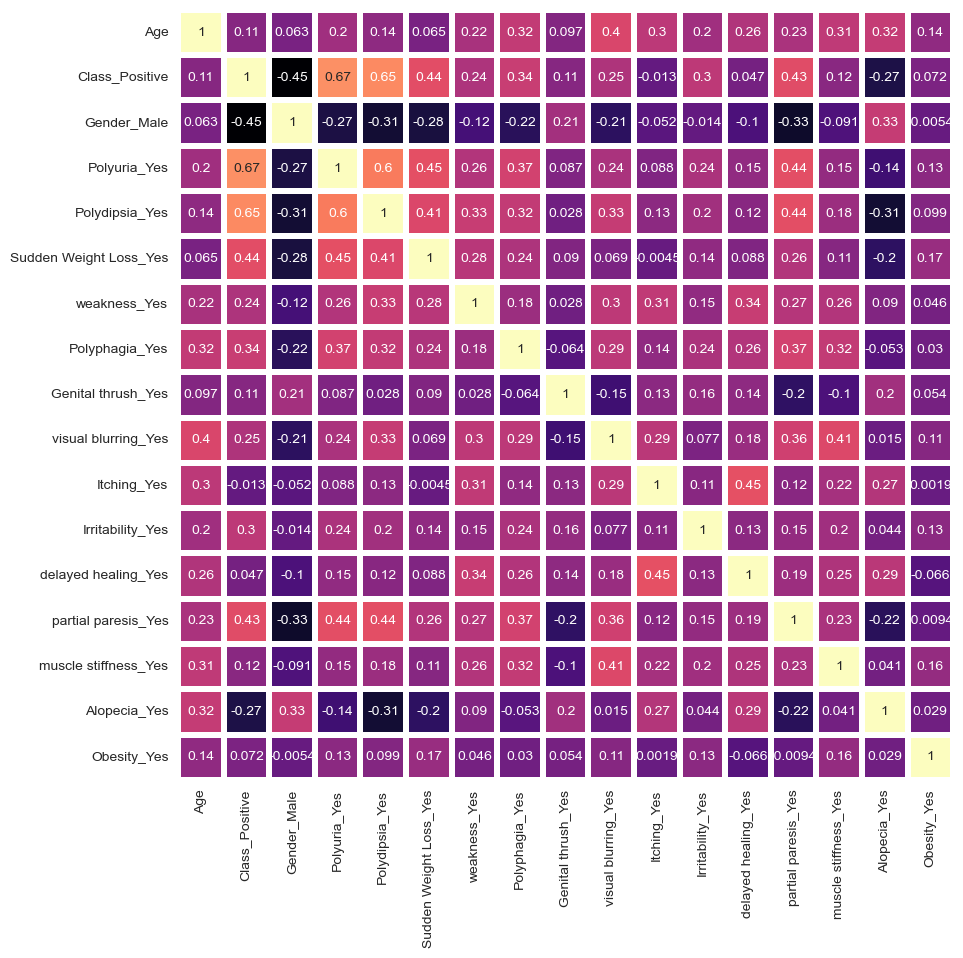

In [276]:
plt.subplots(figsize=(10, 10))
sns.heatmap(diabetes_dataset.corr(), annot=True, cbar=False, cmap='magma', linecolor='white', linewidths=3)

# e) Feature Extraction
# Training and testing data

In [234]:
X = diabetes_dataset.drop('Class_Positive', axis=1)

In [235]:
Y = diabetes_dataset['Class_Positive']

In [236]:
X

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [237]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: Class_Positive, Length: 520, dtype: uint8

In [238]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=101)

In [239]:
print(X.shape, X_train.shape, X_test.shape)

(520, 16) (364, 16) (156, 16)


# f) Model development

# Logistic Regression Model

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
logmodel = LogisticRegression()

In [70]:
# Training the logistic regression model

logmodel.fit(X_train, Y_train)

C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [138]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

# Support Vector Machines (SVM)

In [154]:
from sklearn import svm

In [156]:
from sklearn.svm import SVC

In [161]:
svc_model = SVC()

In [162]:
svc_model.fit(X_train, Y_train)

SVC()

# Decision Trees

In [242]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
dtree = DecisionTreeClassifier()

In [244]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

# Random Forest

In [256]:
from sklearn.ensemble import RandomForestClassifier

In [257]:
rfc = RandomForestClassifier(n_estimators = 200)

In [259]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

# e) Performance:

# Logistic Regression Model

In [277]:
predictions = logmodel.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

In [74]:
# Confusion matrix

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        60
           1       0.94      0.96      0.95        96

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



In [75]:
from sklearn.metrics import confusion_matrix

In [77]:
confusion_matrix(Y_test, predictions)

array([[54,  6],
       [ 4, 92]], dtype=int64)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
# Accuracy score on the training data
X_train_prediction = logmodel.predict(X_train)

In [83]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [85]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9285714285714286


In [86]:
# Accuracy score on the test data
X_test_prediction = logmodel.predict(X_test)

In [87]:
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [88]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9358974358974359


In [278]:
# Score It
from sklearn.metrics import classification_report, accuracy_score

print('Classification Model')
# Accuracy
print('--'*30)
logreg_accuracy = round(accuracy_score(Y_test, predictions) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Classification Model
------------------------------------------------------------
Accuracy 93.59 %


# KNN

In [141]:
pred = knn.predict(X_test)

In [142]:
pred

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0], dtype=uint8)

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

[[59  1]
 [10 86]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91        60
           1       0.99      0.90      0.94        96

    accuracy                           0.93       156
   macro avg       0.92      0.94      0.93       156
weighted avg       0.94      0.93      0.93       156



# Support Vector Machines (SVM)

In [250]:
X_train_prediction_svm = svc_model.predict(X_test)

In [251]:
from sklearn.metrics import classification_report, confusion_matrix

In [252]:
print(confusion_matrix(Y_test, X_train_prediction_svm))
print('\n')
print(classification_report(Y_test, X_train_prediction_svm))

[[ 0 60]
 [ 0 96]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.62      1.00      0.76        96

    accuracy                           0.62       156
   macro avg       0.31      0.50      0.38       156
weighted avg       0.38      0.62      0.47       156



C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
# Accuracy score on the training data
X_train_prediction_svm = svc_model.predict(X_train)

In [164]:
training_data_accuracy_svm = accuracy_score(X_train_prediction, Y_train)

In [165]:
print('Accuracy score of the training data : ', training_data_accuracy_svm)

Accuracy score of the training data :  0.9285714285714286


In [166]:
# Accuracy score on the test data
X_test_prediction_svm = svc_model.predict(X_test)

In [167]:
test_data_accuracy_svm = accuracy_score(X_test_prediction, Y_test)

In [168]:
print('Accuracy score of the training data : ', test_data_accuracy_svm)

Accuracy score of the training data :  0.9358974358974359


# Decision Trees

In [245]:
predictions_dtree = dtree.predict(X_test)

In [246]:
from sklearn.metrics import classification_report, confusion_matrix

In [247]:
print(confusion_matrix(Y_test, predictions_dtree))
print('\n')
print(classification_report(Y_test, predictions_dtree))

[[59  1]
 [ 5 91]]


              precision    recall  f1-score   support

           0       0.92      0.98      0.95        60
           1       0.99      0.95      0.97        96

    accuracy                           0.96       156
   macro avg       0.96      0.97      0.96       156
weighted avg       0.96      0.96      0.96       156



In [262]:
# Accuracy score on the training data
X_train_prediction_dtree = dtree.predict(X_train)

In [263]:
training_data_accuracy_dtree = accuracy_score(X_train_prediction, Y_train)

In [264]:
print('Accuracy score of the training data : ', training_data_accuracy_dtree)

Accuracy score of the training data :  0.9285714285714286


In [265]:
# Accuracy score on the test data
X_test_prediction_dtree = dtree.predict(X_test)

In [266]:
test_data_accuracy_dtree = accuracy_score(X_test_prediction, Y_test)

In [267]:
print('Accuracy score of the test data : ', test_data_accuracy_dtree)

Accuracy score of the test data :  0.9358974358974359


# Random Forest

In [260]:
rfc_pred = rfc.predict(X_test)

In [261]:
print(confusion_matrix(Y_test, rfc_pred))
print('\n')
print(classification_report(Y_test, rfc_pred))

[[60  0]
 [ 3 93]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.97      0.98        96

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



In [268]:
# Accuracy score on the training data
X_train_prediction_rfc = rfc.predict(X_train)

In [269]:
training_data_accuracy_rfc = accuracy_score(X_train_prediction, Y_train)

In [270]:
print('Accuracy score of the training data : ', training_data_accuracy_rfc)

Accuracy score of the training data :  0.9285714285714286


In [271]:
# Accuracy score on the test data
X_test_prediction_rfc = rfc.predict(X_test)

In [272]:
test_data_accuracy_rfc = accuracy_score(X_test_prediction, Y_test)

In [273]:
print('Accuracy score of the test data : ', test_data_accuracy_rfc)

Accuracy score of the test data :  0.9358974358974359


# g) Fine-tune your models & Feature Set:

# Logistic Regression Model

In [89]:
# Making a predictive system

In [129]:
input_data = (62, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1)

In [130]:
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [131]:
input_data_as_numpy_array

array([62,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,  1])

In [132]:
# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

In [133]:
input_data_reshaped

array([[62,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,  1]])

In [134]:
prediction = logmodel.predict(input_data_reshaped)

C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [135]:
print(prediction)

if(prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


In [127]:
input_data = (37, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_as_numpy_array

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = logmodel.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [280]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 0.0641025641025641
Root Mean Squared Error: 0.25318484177091666


# KNN

In [145]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

In [146]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

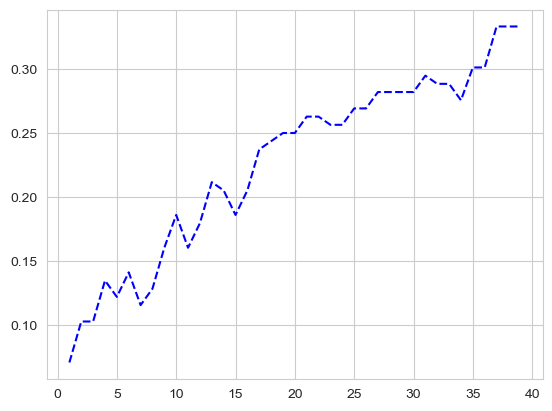

In [147]:
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed')

Text(0, 0.5, 'Error Rate')

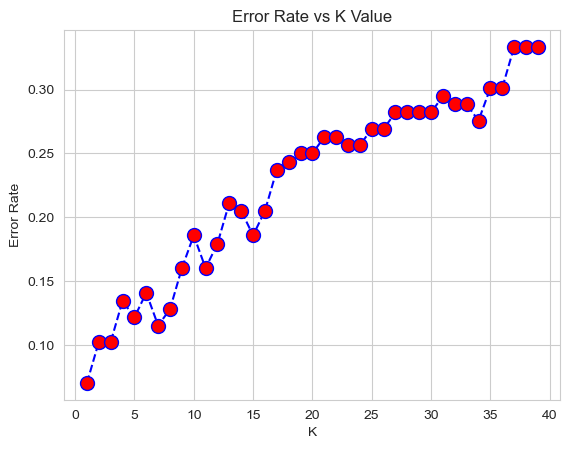

In [148]:
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [153]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, Y_train)

pred = knn.predict(X_test)

print(confusion_matrix(Y_test, pred))
print('\n')
print(classification_report(Y_test, pred))

[[59  1]
 [10 86]]


              precision    recall  f1-score   support

           0       0.86      0.98      0.91        60
           1       0.99      0.90      0.94        96

    accuracy                           0.93       156
   macro avg       0.92      0.94      0.93       156
weighted avg       0.94      0.93      0.93       156



In [285]:
# Score It
from sklearn.metrics import mean_squared_error

print('KNN Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(Y_test, pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

KNN Model
------------------------------------------------------------
Mean Squared Error: 0.07051282051282051
Root Mean Squared Error: 0.2655425022718972


# Support Vector Machines (SVM)

In [169]:
input_data = (37, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_as_numpy_array

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = svc_model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [170]:
input_data = (62, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1)


# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_as_numpy_array

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = svc_model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [286]:
# Score It
from sklearn.metrics import mean_squared_error

print('Support Vector Machine')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(Y_test, X_test_prediction_svm)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Support Vector Machine
------------------------------------------------------------
Mean Squared Error: 0.38461538461538464
Root Mean Squared Error: 0.6201736729460423


# Decision Trees

In [253]:
input_data = (37, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_as_numpy_array

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = dtree.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [254]:
input_data = (62, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1)


# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_as_numpy_array

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = dtree.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [287]:
# Score It
from sklearn.metrics import mean_squared_error

print('Decision Trees')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(Y_test, predictions_dtree)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Decision Trees
------------------------------------------------------------
Mean Squared Error: 0.038461538461538464
Root Mean Squared Error: 0.19611613513818404


# Random Forest

In [274]:
input_data = (37, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_as_numpy_array

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = rfc.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [275]:
input_data = (62, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1)


# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_as_numpy_array

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = rfc.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [288]:
# Score It
from sklearn.metrics import mean_squared_error

print('Random Forest')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(Y_test, rfc_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Random Forest
------------------------------------------------------------
Mean Squared Error: 0.019230769230769232
Root Mean Squared Error: 0.1386750490563073
